In [1]:
#Uncomment the pip install code below if you have not installed pandas. 

#!pip install pandas

#Import the pandas library
import pandas as pd

#Link to Kaggle dataset = https://www.kaggle.com/datasets/bhanupratapbiswas/uber-data-analysis

In [2]:
#Read the dataset into a pandas dataframe. 

uber = pd.read_csv('UberDataset.csv')
uber

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
#This dataset contains 1156 rows with 7 columns. We can drop the last row - the "totals" row, as it will skew our analyses. 
uber.drop(1155,inplace = True)

In [4]:
#First, let's take a quick view of the data to understand its components.  
uber.info() #The info() method prints information about the DataFrame, including data types and the non-null count for each column. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
#Use str.lower() to change the column names to lower case.
uber.columns= uber.columns.str.lower()
uber.columns

Index(['start_date', 'end_date', 'category', 'start', 'stop', 'miles',
       'purpose'],
      dtype='object')

In [6]:
#We need to change the start and end date columns to the 'datetime' data type using pd.to_datetime(). 
uber['start_date']= pd.to_datetime(uber['start_date'])
uber['end_date']= pd.to_datetime(uber['end_date'])
uber[['start_date', 'end_date']]

,start_date,end_date
0,2016-01-01 21:11:00,2016-01-01 21:17:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00
...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00
1151,2016-12-31 13:24:00,2016-12-31 13:42:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00


In [7]:
#Let's verify that 'purpose' contains missing values using isna() followed by the sum() method. 
uber.isna().sum()

start_date      0
end_date        0
category        0
start           0
stop            0
miles           0
purpose       502
dtype: int64

In [8]:
#Question 1: What are the top 20 starting cities with the most rides in the data set? 

In [9]:
#We will use the value_counts() method, followed by [0:20] to pull the first 20 positions in the index. 
top20=uber['start'].value_counts()[0:20]
top20
#In order to remove the "Unknown Location" row, let's re-run "Top 20" with the first 21 rows, and then use the drop() function to remove the desired row. 
top20=uber['start'].value_counts()[0:21]
top20 = top20.drop('Unknown Location')
top20
#Now top20 displays the top 20 starting cities with the most rides in the data set. 

Cary              201
Morrisville        85
Whitebridge        68
Islamabad          57
Durham             37
Lahore             36
Raleigh            28
Kar?chi            27
Westpark Place     17
Apex               17
Berkeley           16
Midtown            14
Kenner             11
Kissimmee          11
R?walpindi         11
New Orleans        10
Emeryville         10
Downtown            9
Edgehill Farms      8
Central             8
Name: start, dtype: int64

In [10]:
#Question 2: Which five starting cities have the highest average ride length? 

In [11]:
#We need to add a new column to the DataFrame titled "ride_length" which subtracts start date from end date to determine the length of each Uber ride. 
uber['ride_length'] = uber['end_date'] - uber['start_date']
uber['ride_length']

0      0 days 00:06:00
1      0 days 00:12:00
2      0 days 00:13:00
3      0 days 00:14:00
4      0 days 01:07:00
             ...      
1150   0 days 00:07:00
1151   0 days 00:18:00
1152   0 days 00:35:00
1153   0 days 00:18:00
1154   0 days 01:43:00
Name: ride_length, Length: 1155, dtype: timedelta64[ns]

In [12]:
#Create a new DataFrame containing only the 'start' and 'ride_length' columns. 
uber_start_rl = uber[['start','ride_length']]

#Group the new DataFrame by 'start' using groupby() and calculate the average ride_length using mean(). Then, sort by descending average ride_length. 
average_ride_length = uber_start_rl.groupby('start').mean().sort_values(by = 'ride_length', ascending=False)

#Display the new DataFrame at iloc positions 0 through 5. iloc uses the implicit index. These are the five cities with the highest average ride length. 
top5 = average_ride_length.iloc[0:5]
top5

,ride_length
start,
Latta,0 days 05:30:00
Jacksonville,0 days 02:51:30
Asheville,0 days 02:24:00
Ridgeland,0 days 02:23:00
Austin,0 days 02:19:00


In [13]:
#Question 3: What is the average speed of each ride in miles per hour? 

#Convert the ride_length column to hours using the total.seconds method. Add the new 'hours' column to the original DataFrame. 
uber['hours'] = uber['ride_length'].dt.total_seconds() / 3600
uber['hours']

0       0.100000
1       0.200000
2       0.216667
3       0.233333
4       1.116667
          ...   
1150    0.116667
1151    0.300000
1152    0.583333
1153    0.300000
1154    1.716667
Name: hours, Length: 1155, dtype: float64

In [14]:
#Divide 'miles' by 'hours' to determine the average mph of each trip. Add this as a new column to the original DataFrame. 
uber['mph'] = uber['miles'] / uber ['hours']
uber

,start_date,end_date,category,start,stop,miles,purpose,ride_length,hours,mph
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,0.100000,51.000000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,0 days 00:12:00,0.200000,25.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,0.216667,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,0.233333,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,1.116667,57.044776
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,0 days 00:07:00,0.116667,6.000000
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,0.300000,13.000000
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,0.583333,27.771429
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,0.300000,21.333333


In [15]:
#Question 4: How does the average miles per hour compare among ride purposes?

In [16]:
#Create a new DataFrame containing only the 'purpose' and 'mph' columns. 
uber_purpose_mph = uber[['purpose','mph']]

#Perform a similar option as we did for the average ride length. 
avg_mph = uber_purpose_mph.groupby('purpose').mean().sort_values(by = 'mph', ascending=False)
avg_mph

,mph
purpose,
Commute,58.443243
Charity ($),33.555556
Customer Visit,30.294273
Temporary Site,29.152836
Meeting,28.545516
Between Offices,25.622915
Meal/Entertain,21.759906
Errand/Supplies,19.463559
Moving,18.388393


<Axes: title={'center': 'Average MPH by Purpose'}, xlabel='purpose'>

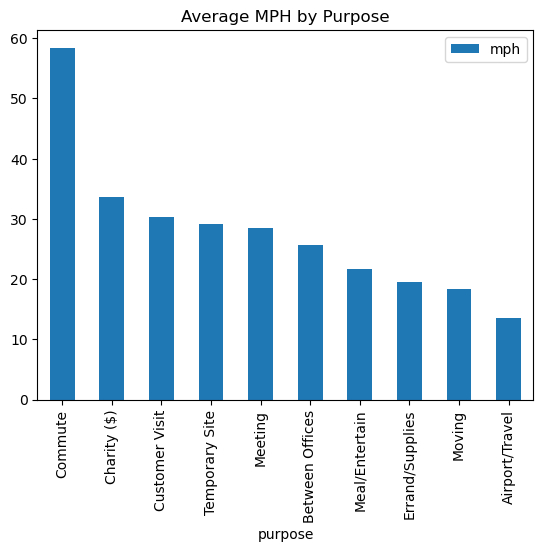

In [17]:
#We can create a basic bar chart using .plot(). 

avg_mph.plot(kind='bar', title = 'Average MPH by Purpose')

In [18]:
#Question 5: What percentage of business rides start and stop in the same location? 

In [19]:
#Create a new DataFrame containing the 'category', 'start', and 'stop' columns. 
cats = uber[['category', 'start', 'stop']]
cats

,category,start,stop
0,Business,Fort Pierce,Fort Pierce
1,Business,Fort Pierce,Fort Pierce
2,Business,Fort Pierce,Fort Pierce
3,Business,Fort Pierce,Fort Pierce
4,Business,Fort Pierce,West Palm Beach
...,...,...,...
1150,Business,Kar?chi,Kar?chi
1151,Business,Kar?chi,Unknown Location
1152,Business,Unknown Location,Unknown Location
1153,Business,Katunayake,Gampaha


In [20]:
#Create a new DataFrame containing the entries from 'cats' if 'start' is equal to 'stop'.
start_equals_stop = cats[cats['start']==cats['stop']]

#Divide the length (number of rows) in our new DataFrame by the length of the DataFrame that contains all rows. 
print(round((len(start_equals_stop)/len(uber)) * 100,2), '%', 'of business rides start and stop in the same location.')

24.94 % of business rides start and stop in the same location.
